# Platforma ray

In [1]:
import ray
import time
# ray.init(dashboard_host='0.0.0.0')

In [2]:
# ray.shutdown()

Tablica *Dashboard* jest dostępna pod adresem http://localhost:8265

## 1. Zadania (Tasks)
Cytując: *"Ray enables arbitrary functions to be executed asynchronously on separate Python workers. Such functions are called Ray remote functions and their asynchronous invocations are called Ray tasks."*

In [3]:
@ray.remote
def suma(a,b):
    return a + b

In [4]:
# Ta funkcja nie zostanie wywołana
# suma(1,2)

In [5]:
# Sprawdż dashboard
suma.remote(1,2)

2025-05-31 19:34:51,021	WARNING services.py:2159 -- WARNING: The object store is using /tmp instead of /dev/shm because /dev/shm has only 4294967296 bytes available. This will harm performance! You may be able to free up space by deleting files in /dev/shm. If you are inside a Docker container, you can increase /dev/shm size by passing '--shm-size=6.87gb' to 'docker run' (or add it to the run_options list in a Ray cluster config). Make sure to set this to more than 30% of available RAM.
2025-05-31 19:34:52,165	INFO worker.py:1879 -- Started a local Ray instance. View the dashboard at 127.0.0.1:8265 


ObjectRef(c8ef45ccd0112571ffffffffffffffffffffffff0100000001000000)

(ProxyActor pid=2049) INFO 2025-05-31 19:53:28,997 proxy 172.17.0.2 -- Proxy starting on node 6aec71857930dedb9182abc5eef76026fb834ca5a4f0f6532c653c47 (HTTP port: 8000).
(ProxyActor pid=2049) INFO 2025-05-31 19:53:29,017 proxy 172.17.0.2 -- Got updated endpoints: {}.
(ServeController pid=1998) INFO 2025-05-31 19:53:31,126 controller 1998 -- Deploying new version of Deployment(name='FastAPIDeployment', app='default') (initial target replicas: 1).
(ProxyActor pid=2049) INFO 2025-05-31 19:53:31,129 proxy 172.17.0.2 -- Got updated endpoints: {Deployment(name='FastAPIDeployment', app='default'): EndpointInfo(route='/', app_is_cross_language=False)}.
(ProxyActor pid=2049) INFO 2025-05-31 19:53:31,137 proxy 172.17.0.2 -- Started <ray.serve._private.router.SharedRouterLongPollClient object at 0xffff881c4a90>.
(ServeController pid=1998) INFO 2025-05-31 19:53:31,233 controller 1998 -- Adding 1 replica to Deployment(name='FastAPIDeployment', app='default').
(ServeReplica:default:FastAPIDeployment

In [6]:
result_ref = suma.remote(1,2)
# Pobierz wynik
ray.get(result_ref)

3

### 1.1 Składanie wywołań 

In [7]:
result_ref = suma.remote(suma.remote(1,2),suma.remote(3,4))
ray.get(result_ref)

10

Zadania ```suma.remote(1,2)``` i ```suma.remote(3,4)``` mogą być wykonywane współbieżnie na różnych węzłach obliczeniowych. Zadanie zwracające ostateczny wynik będzie oczekiwało na zakończenie poprzednich.

Ray analizuje zależności między funkcjami i tworzy graf zależności, który jest używany do efektywnego i równoległego wykonania zadań. 

In [8]:
r1 = suma.remote(1,2)
r2 = suma.remote(3,4)
result_ref = suma.remote(r1,r2)
ray.get(result_ref)

10

### 1.2 Jeśli funkcja nie zwraca wartości

In [9]:
@ray.remote
def void_foo(*params):
    for k in params:
        print(k,end=' ')
    print()

void_foo.remote(1,'ala',3.5,True)

ObjectRef(8849b62d89cb30f9ffffffffffffffffffffffff0100000001000000)

**TODO 1.2.1** Znajdź wydruk Dashboard:Jobs > void_foo > stdout

### 1.3 Ciąg Fibonacciego -  rekurencja
Napisz funkcję obliczającą rekurencyjnie n-tą wartość ciągu Fibbonaciego.
Sprawdź na tablicy Dashboard ile razy była wywołana funckja dla róznych wartości parametrów (ale raczej n <= 10)

In [10]:
@ray.remote
def fibo(n):
    print(n)
    if n <= 1:
        return n
    else:
        return ray.get(fibo.remote(n-1)) + ray.get(fibo.remote(n-2))

obj_ref = fibo.remote(10)
ray.get(obj_ref)

(void_foo pid=663) 1 ala 3.5 True 
(fibo pid=666) 9
(fibo pid=663) 10
(fibo pid=665) 8
(fibo pid=660) 7
(fibo pid=661) 6
(fibo pid=659) 5
(fibo pid=668) 4
(fibo pid=670) 3
(fibo pid=659) 4
(fibo pid=668) 3
(fibo pid=668) 3
(fibo pid=668) 2
(fibo pid=669) 2
(fibo pid=669) 1
(fibo pid=669) 1
(fibo pid=669) 0
(fibo pid=669) 1
(fibo pid=669) 0
(fibo pid=669) 1
(fibo pid=669) 0
(fibo pid=670) 2
(fibo pid=670) 2
(fibo pid=670) 1
(fibo pid=670) 2
(fibo pid=670) 1
(fibo pid=670) 1
(fibo pid=670) 0
(fibo pid=662) 1
(fibo pid=662) 0
(fibo pid=661) 5
(fibo pid=659) 4
(fibo pid=668) 3
(fibo pid=670) 2
(fibo pid=669) 1
(fibo pid=669) 0
(fibo pid=666) 8
(fibo pid=665) 7
(fibo pid=665) 7
(fibo pid=660) 6
(fibo pid=660) 6
(fibo pid=660) 5
(fibo pid=660) 6
(fibo pid=661) 5
(fibo pid=661) 4
(fibo pid=661) 5
(fibo pid=661) 4
(fibo pid=661) 4
(fibo pid=661) 3
(fibo pid=661) 5
(fibo pid=659) 3
(fibo pid=659) 4
(fibo pid=659) 3
(fibo pid=659) 3
(fibo pid=659) 2
(fibo pid=659) 4
(fibo pid=659) 3
(fibo pid=65

55

### 1.4 Ciąg Fibonacciego -  iteracyjnie

In [11]:
@ray.remote
def next_fibo_number(a,b):
    return a + b

obj_ref = next_fibo_number.remote(1,2)
ray.get(obj_ref)


3

**TODO 1.4.1** Wykorzystaj funcję ```next_fibo_number``` do wzynaczenia elementu ciągu Fibboncciego o mnumerze 102 

In [12]:
@ray.remote
def fibo_iterative(n):
    if n <= 2:
        return 1
        
    a = 1
    b = 1
    
    for _ in range(n-2):
        obj_ref = next_fibo_number.remote(a, b)
        next_num = ray.get(obj_ref)
        a = b
        b = next_num
    
    return b

result = ray.get(fibo_iterative.remote(102))
result



927372692193078999176

Dlaczego w tej wersji działa znacznie szybciej? Jak (zapewne) wyglądają drzewa zależnoci w tych dwóch przypadkach?



### 1.5 Obliczanie pi

**TODO 1.5.1** Napisz funkcję zgodnie ze specyfikacją

In [13]:
import random
num_slices=100
slice_size=1000_000

@ray.remote
def compute_pi_on_slice(slice_size):
    """
    Params: slice_size - liczba powtórzeń
    Funkcja losuje dwie liczby x i y i sparwdza, czy mieszczą się w ćwiartce koła. Jesli tak, inkremetuje sumę.
    Returns: 4 * suma/ slice_size
    """
    sum_val = 0
    for _ in range(slice_size):
        x = random.random()
        y = random.random()
        if x*x + y*y <= 1.0:
            sum_val += 1
    return 4 * sum_val / slice_size

object_ref = compute_pi_on_slice.remote(slice_size=slice_size)
ray.get(object_ref)

3.143416

In [14]:
# Dashboard
tab_ref = [compute_pi_on_slice.remote(slice_size=slice_size) for i in range(num_slices)]

In [15]:
# Pobiera wszystkie elementy
# ray.get(tab_ref)

In [16]:
tab_ref = [compute_pi_on_slice.remote(slice_size=slice_size) for i in range(num_slices)]

Funkcja ```ray.wait()``` pobiera informacje o gotowych i oczekujących zadaniach na liście

In [17]:
ready,remaining = ray.wait(tab_ref,num_returns=len(tab_ref),timeout=1)
print('-------------------------- ready ------------------------')
print(ready)
print('------------------------ remaining ----------------------')
print(remaining)

-------------------------- ready ------------------------
[]
------------------------ remaining ----------------------
[ObjectRef(a46bb8530f4064fdffffffffffffffffffffffff0100000001000000), ObjectRef(c0ca37ae352c9211ffffffffffffffffffffffff0100000001000000), ObjectRef(798376f73f71e22cffffffffffffffffffffffff0100000001000000), ObjectRef(d99fa8d5c923d7c8ffffffffffffffffffffffff0100000001000000), ObjectRef(aa5ec071964645d2ffffffffffffffffffffffff0100000001000000), ObjectRef(e3a0a2b2c6761c99ffffffffffffffffffffffff0100000001000000), ObjectRef(28241d0dda191e41ffffffffffffffffffffffff0100000001000000), ObjectRef(aea28d72824b5c00ffffffffffffffffffffffff0100000001000000), ObjectRef(6710354e78dd8e3affffffffffffffffffffffff0100000001000000), ObjectRef(a2646843e7781738ffffffffffffffffffffffff0100000001000000), ObjectRef(2f7fdef4e2df3f2bffffffffffffffffffffffff0100000001000000), ObjectRef(9382939a56d17e30ffffffffffffffffffffffff0100000001000000), ObjectRef(8c115ad83d29434cffffffffffffffffffffffff01

## 2. Aktorzy

Cytując: *"Actors extend the Ray API from functions (tasks) to classes. An actor is essentially a stateful worker (or a service). When a new actor is instantiated, a new worker is created, and methods of the actor are scheduled on that specific worker and can access and mutate the state of that worker."*

### 2.1 Aktor łączący teksty

In [18]:
@ray.remote
class Concatenator:
    
    def __init__(self,initial_text=''):
        self.text = initial_text
    
    def append(self,text):
        print(f'[append called] with param: {text}')
        self.text += '\n'
        self.text += text

    def get(self):
        print(f'[get called]')
        return self.text

# wywołanie konstruktora
conc_ref = Concatenator.remote('Lokomotywa') 

# wywołanie zdalnych metod obiektu
conc_ref.append.remote('Stoi na stacji lokomotywa')
conc_ref.append.remote('Ciężka, ogromna i pot z niej spływa -')
conc_ref.append.remote('Tłusta oliwa.') 

text_ref = conc_ref.get.remote()
print(ray.get(text_ref))

# opcjonalnie można usunąć
# del conc_ref

Lokomotywa
Stoi na stacji lokomotywa
Ciężka, ogromna i pot z niej spływa -
Tłusta oliwa.


### 2.2 Aktor zliczający słowa

Counter przechowuje informacje o liczbie wystąpień obiektów

In [19]:
from collections import Counter
counter = Counter()
counter.update([1,1,2,1,1,3,2,'a','a','b'])
counter.most_common(3)


[(1, 4), (2, 2), ('a', 2)]

Wykorzystamy go do policznia wystąpień słów w tekscie

In [20]:
url = 'https://wolnelektury.pl/media/book/txt/w-pustyni-i-w-puszczy.txt'
import requests
text = requests.get(url).text
words = text.split()
words[:30]

['Henryk',
 'Sienkiewicz',
 'W',
 'pustyni',
 'i',
 'w',
 'puszczy',
 'ISBN',
 '978-83-288-2842-1',
 'ROZDZIAŁ',
 'I',
 '—',
 'Wiesz,',
 'Nel',
 '—',
 'mówił',
 'Staś',
 'Tarkowski',
 'do',
 'swojej',
 'przyjaciółki,',
 'małej',
 'Angielki',
 '—',
 'wczoraj',
 'przyszli',
 'zabtie',
 '(policjanci)',
 'i',
 'aresztowali']

Poprawimy wydzielanie symboli

In [21]:
from bs4 import BeautifulSoup
import re
import requests

def tokenize(text): 
    text = BeautifulSoup(text, features="html.parser").get_text(' ')
    text = re.sub(r"[#\",!?;-<>/\\*\\&-]", " ", text) #znaki
    text = re.sub('\[[^\]]*\]',' ',text) #
    text = re.sub(r"[:\.\+\=()–©°′″•↑—]", " ", text) #reszta znaków
    text = re.sub(r"\d+\.?\d*", " ", text) #liczby
    words = text.split()
    return words



from collections import Counter
word_freq = Counter()

url = 'https://wolnelektury.pl/media/book/txt/w-pustyni-i-w-puszczy.txt'

text = requests.get(url).text

words = tokenize(text)
word_freq.update(words)
top_words=word_freq.most_common(10)
top_words

[('i', 3831),
 ('się', 2739),
 ('w', 2061),
 ('na', 1867),
 ('nie', 1776),
 ('z', 1705),
 ('że', 1391),
 ('do', 1185),
 ('a', 820),
 ('to', 757)]

In [22]:
word_freq.most_common()[-20:-1]

[('Publikacja', 1),
 ('zrealizowana', 1),
 ('Reprodukcja', 1),
 ('cyfrowa', 1),
 ('Bibliotekę', 1),
 ('Narodową', 1),
 ('egzemplarza', 1),
 ('pochodzącego', 1),
 ('zbiorów', 1),
 ('BN', 1),
 ('Opracowanie', 1),
 ('redakcyjne', 1),
 ('Izabela', 1),
 ('Erdmann', 1),
 ('Tomasz', 1),
 ('Jodełka', 1),
 ('Burzecki', 1),
 ('Sekuła', 1),
 ('Olga', 1)]

Kolejne uaktualnienie

In [23]:
text = requests.get('https://pl.wikipedia.org/wiki/Polska').text

words = tokenize(text)
word_freq.update(words)
top_words=word_freq.most_common(10)
top_words

[('i', 4585),
 ('w', 3209),
 ('się', 2995),
 ('na', 2210),
 ('z', 2039),
 ('nie', 1815),
 ('że', 1406),
 ('do', 1390),
 ('a', 970),
 ('to', 827)]

**TODO 2.2.1** Napisz klasę (aktora) ```WordCountingActor``` z metodami:
* konstruktorem - inicjalizuje atrybut typu ```Counter```
* tokenize() - wykorzystaj gotową funkcję
* add_text(self,text:str) - dzieli tekst na słowa i uaktualnia licznik
* get_top_words(self,n: int) - zwraca n najczęsciej występujących słów

In [24]:
from collections import Counter
from bs4 import BeautifulSoup
import re

@ray.remote
class WordCountingActor:
    def __init__(self):
        self.counter = Counter()
        

    def tokenize(self, text:str): 
       return tokenize(text)

    def add_text(self, text:str):
       words = self.tokenize(text)
       self.counter.update(words)

    def get_top_words(self,n: int):
        return self.counter.most_common(n)

**TODO 2.2.2** Utwórz aktora i dodawaj teksty pobrane ze stron internetowych. Możesz rozszerzyć przykładową listę. Po dodaniu teksty wypisz 10 najczęściej pojawiająych się słów.

In [25]:
urls = ['https://pl.wikipedia.org/wiki/Akademia_G%C3%B3rniczo-Hutnicza_im._Stanis%C5%82awa_Staszica_w_Krakowie',
        'https://pl.wikipedia.org/wiki/Polska',
        'https://pl.wikipedia.org/wiki/Krak%C3%B3w',
        'https://www.agh.edu.pl/']


In [26]:
wca_ref = WordCountingActor.remote()
for url in urls:
    text = requests.get(url).text
    wca_ref.add_text.remote(text)

top_words = wca_ref.get_top_words.remote(10)

In [27]:
ray.get(top_words)

[('w', 2161),
 ('i', 1418),
 ('z', 715),
 ('na', 623),
 ('się', 452),
 ('W', 390),
 ('do', 387),
 ('r', 370),
 ('Polski', 273),
 ('Kraków', 270)]

## 3. Obiekty (object)

Cytując: *"In Ray, tasks and actors create and compute on objects. We refer to these objects as remote objects because they can be stored anywhere in a Ray cluster, and we use object refs to refer to them. Remote objects are cached in Ray’s distributed shared-memory object store, and there is one object store per node in the cluster. In the cluster setting, a remote object can live on one or many nodes, independent of who holds the object ref(s).*

*An object ref is essentially a pointer or a unique ID that can be used to refer to a remote object without seeing its value. If you’re familiar with futures, Ray object refs are conceptually similar."*

Załadujemy obraz i utworzymy reprezentujący go obiekt

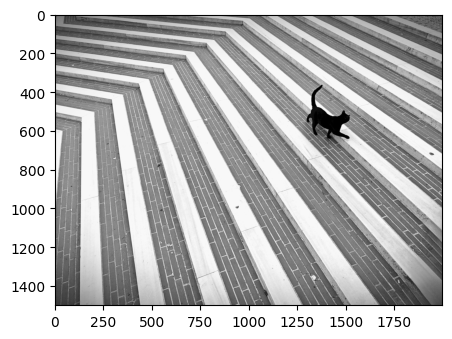

In [28]:
from PIL import Image
import requests
from io import BytesIO
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['figure.figsize'] = (5, 5)

response = requests.get('https://images.pexels.com/photos/32277444/pexels-photo-32277444/free-photo-of-black-cat-on-geometric-steps-in-istanbul.jpeg?auto=compress&cs=tinysrgb&w=1260&h=750&dpr=2')
img = Image.open(BytesIO(response.content))
img = np.array(img)

plt.imshow(img, cmap='gray')
plt.show()

In [29]:
img_ref = ray.put(img)

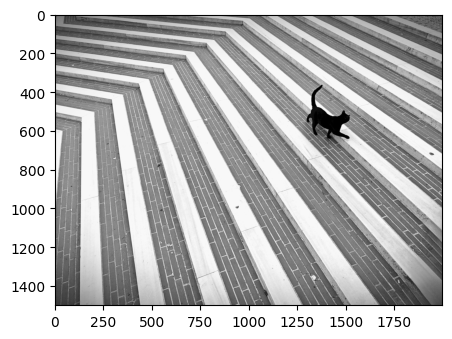

In [30]:
img_copy = ray.get(img_ref)
plt.imshow(img_copy,cmap='gray')
plt.show()

## 4. Biblioteka  Ray Data i Dataset
Cytując: *"Ray Data is a scalable data processing library for ML workloads. It provides flexible and performant APIs for scaling Offline batch inference and Data preprocessing and ingest for ML training. Ray Data uses streaming execution to efficiently process large datasets.*

Podstawową klasą jest ```Dataset```. Podobue, jak w przypadku Sparka możliwy jest:
* odczyt danych z róznych źródeł
* zapis w róznych formatach
* podstawowe transformacje (w tym konwersja do Pandas)
* podział na wsady (batch)
* automatyczne partycjonowanie i rozkładanie pomiędzy węzły
* iteracja po pojedynczych danych lub z podziałem na wsady w formatach zgodnych z Tensorflow i Torch


In [31]:
ds_train = ray.data.read_csv("twitter_training.csv")
ds_test = ray.data.read_csv("twitter_validation.csv")

In [32]:
ds_train

2025-05-31 19:35:00,427	INFO logging.py:290 -- Registered dataset logger for dataset dataset_0_0
2025-05-31 19:35:00,436	INFO streaming_executor.py:117 -- Starting execution of Dataset dataset_0_0. Full logs are in /tmp/ray/session_2025-05-31_19-34-49_939668_14/logs/ray-data
2025-05-31 19:35:00,437	INFO streaming_executor.py:118 -- Execution plan of Dataset dataset_0_0: InputDataBuffer[Input] -> TaskPoolMapOperator[ReadCSV]


Running 0: 0.00 row [00:00, ? row/s]

- ReadCSV->SplitBlocks(24) 1: 0.00 row [00:00, ? row/s]

2025-05-31 19:35:00,723	INFO streaming_executor.py:220 -- ✔️  Dataset dataset_0_0 execution finished in 0.29 seconds


Dataset(
   num_rows=74682,
   schema={
      TweetId: int64,
      Entity: string,
      Sentiment: string,
      TweetContent: string
   }
)

In [33]:
ds_train.show(5)

2025-05-31 19:35:00,755	INFO dataset.py:3027 -- Tip: Use `take_batch()` instead of `take() / show()` to return records in pandas or numpy batch format.
2025-05-31 19:35:00,759	INFO logging.py:290 -- Registered dataset logger for dataset dataset_2_0
2025-05-31 19:35:00,762	INFO streaming_executor.py:117 -- Starting execution of Dataset dataset_2_0. Full logs are in /tmp/ray/session_2025-05-31_19-34-49_939668_14/logs/ray-data
2025-05-31 19:35:00,762	INFO streaming_executor.py:118 -- Execution plan of Dataset dataset_2_0: InputDataBuffer[Input] -> TaskPoolMapOperator[ReadCSV] -> LimitOperator[limit=5]


Running 0: 0.00 row [00:00, ? row/s]

- ReadCSV->SplitBlocks(24) 1: 0.00 row [00:00, ? row/s]

- limit=5 2: 0.00 row [00:00, ? row/s]

2025-05-31 19:35:01,061	INFO streaming_executor.py:220 -- ✔️  Dataset dataset_2_0 execution finished in 0.30 seconds


{'TweetId': 2401, 'Entity': 'Borderlands', 'Sentiment': 'Positive', 'TweetContent': 'im getting on borderlands and i will murder you all ,'}
{'TweetId': 2401, 'Entity': 'Borderlands', 'Sentiment': 'Positive', 'TweetContent': 'I am coming to the borders and I will kill you all,'}
{'TweetId': 2401, 'Entity': 'Borderlands', 'Sentiment': 'Positive', 'TweetContent': 'im getting on borderlands and i will kill you all,'}
{'TweetId': 2401, 'Entity': 'Borderlands', 'Sentiment': 'Positive', 'TweetContent': 'im coming on borderlands and i will murder you all,'}
{'TweetId': 2401, 'Entity': 'Borderlands', 'Sentiment': 'Positive', 'TweetContent': 'im getting on borderlands 2 and i will murder you me all,'}


In [34]:
ds_train.stats()

'Operator 1 ReadCSV->SplitBlocks(24): 1 tasks executed, 4 blocks produced in 0.05s\n* Remote wall time: 96.17us min, 50.06ms max, 12.61ms mean, 50.42ms total\n* Remote cpu time: 95.88us min, 38.2ms max, 9.66ms mean, 38.62ms total\n* UDF time: 0us min, 0us max, 0.0us mean, 0us total\n* Peak heap memory usage (MiB): 133.1 min, 133.1 max, 133 mean\n* Output num rows per block: 3112 min, 3112 max, 3112 mean, 12448 total\n* Output size bytes per block: 429197 min, 486850 max, 462329 mean, 1849318 total\n* Output rows per task: 12448 min, 12448 max, 12448 mean, 1 tasks used\n* Tasks per node: 1 min, 1 max, 1 mean; 1 nodes used\n* Operator throughput:\n\t* Ray Data throughput: 232623.25495200497 rows/s\n\t* Estimated single node throughput: 246868.60815923865 rows/s\n\nOperator 2 limit=5: 1 tasks executed, 1 blocks produced in 0.05s\n* Remote wall time: 50.06ms min, 50.06ms max, 50.06ms mean, 50.06ms total\n* Remote cpu time: 38.2ms min, 38.2ms max, 38.2ms mean, 38.2ms total\n* UDF time: 0us 

### 4.1 Podstawowe transformacje

#### to_pandas

In [35]:
df_train = ds_train.to_pandas()
df_test = ds_test.to_pandas()
df_train.head(10)

2025-05-31 19:35:01,131	INFO logging.py:290 -- Registered dataset logger for dataset dataset_0_1
2025-05-31 19:35:01,135	INFO streaming_executor.py:117 -- Starting execution of Dataset dataset_0_1. Full logs are in /tmp/ray/session_2025-05-31_19-34-49_939668_14/logs/ray-data
2025-05-31 19:35:01,135	INFO streaming_executor.py:118 -- Execution plan of Dataset dataset_0_1: InputDataBuffer[Input] -> TaskPoolMapOperator[ReadCSV]


Running 0: 0.00 row [00:00, ? row/s]

- ReadCSV->SplitBlocks(24) 1: 0.00 row [00:00, ? row/s]

2025-05-31 19:35:01,220	INFO streaming_executor.py:220 -- ✔️  Dataset dataset_0_1 execution finished in 0.09 seconds
2025-05-31 19:35:01,234	INFO logging.py:290 -- Registered dataset logger for dataset dataset_1_0
2025-05-31 19:35:01,237	INFO streaming_executor.py:117 -- Starting execution of Dataset dataset_1_0. Full logs are in /tmp/ray/session_2025-05-31_19-34-49_939668_14/logs/ray-data
2025-05-31 19:35:01,237	INFO streaming_executor.py:118 -- Execution plan of Dataset dataset_1_0: InputDataBuffer[Input] -> TaskPoolMapOperator[ReadCSV]


Running 0: 0.00 row [00:00, ? row/s]

- ReadCSV->SplitBlocks(24) 1: 0.00 row [00:00, ? row/s]

2025-05-31 19:35:01,284	INFO streaming_executor.py:220 -- ✔️  Dataset dataset_1_0 execution finished in 0.05 seconds


,TweetId,Entity,Sentiment,TweetContent
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
5,2401,Borderlands,Positive,im getting into borderlands and i can murder y...
6,2402,Borderlands,Positive,So I spent a few hours making something for fu...
7,2402,Borderlands,Positive,So I spent a couple of hours doing something f...
8,2402,Borderlands,Positive,So I spent a few hours doing something for fun...
9,2402,Borderlands,Positive,So I spent a few hours making something for fu...


#### select_columns

In [36]:
ds2 = ds_train.select_columns(['Entity','Sentiment']).show(5)

2025-05-31 19:35:01,343	INFO logging.py:290 -- Registered dataset logger for dataset dataset_4_0
2025-05-31 19:35:01,346	INFO streaming_executor.py:117 -- Starting execution of Dataset dataset_4_0. Full logs are in /tmp/ray/session_2025-05-31_19-34-49_939668_14/logs/ray-data
2025-05-31 19:35:01,347	INFO streaming_executor.py:118 -- Execution plan of Dataset dataset_4_0: InputDataBuffer[Input] -> TaskPoolMapOperator[ReadCSV] -> TaskPoolMapOperator[Project] -> LimitOperator[limit=5]


Running 0: 0.00 row [00:00, ? row/s]

- ReadCSV->SplitBlocks(24) 1: 0.00 row [00:00, ? row/s]

- Project 2: 0.00 row [00:00, ? row/s]

- limit=5 3: 0.00 row [00:00, ? row/s]

2025-05-31 19:35:01,632	INFO streaming_executor.py:220 -- ✔️  Dataset dataset_4_0 execution finished in 0.28 seconds


{'Entity': 'Borderlands', 'Sentiment': 'Positive'}
{'Entity': 'Borderlands', 'Sentiment': 'Positive'}
{'Entity': 'Borderlands', 'Sentiment': 'Positive'}
{'Entity': 'Borderlands', 'Sentiment': 'Positive'}
{'Entity': 'Borderlands', 'Sentiment': 'Positive'}


#### groupby

In [37]:
ds2 = ds_train.select_columns(['Entity','Sentiment']).groupby(['Entity','Sentiment']).count()

In [38]:
ds2.to_pandas()

2025-05-31 19:35:01,722	INFO logging.py:290 -- Registered dataset logger for dataset dataset_7_0
2025-05-31 19:35:01,727	INFO streaming_executor.py:117 -- Starting execution of Dataset dataset_7_0. Full logs are in /tmp/ray/session_2025-05-31_19-34-49_939668_14/logs/ray-data
2025-05-31 19:35:01,727	INFO streaming_executor.py:118 -- Execution plan of Dataset dataset_7_0: InputDataBuffer[Input] -> TaskPoolMapOperator[ReadCSV] -> TaskPoolMapOperator[Project] -> AllToAllOperator[Aggregate]


Running 0: 0.00 row [00:00, ? row/s]

- ReadCSV->SplitBlocks(24) 1: 0.00 row [00:00, ? row/s]

- Project 2: 0.00 row [00:00, ? row/s]

- Aggregate 3: 0.00 row [00:00, ? row/s]

Sort Sample 4:   0%|                 | 0.00/1.00 [00:00<?, ? row/s]

Shuffle Map 5:   0%|                 | 0.00/1.00 [00:00<?, ? row/s]

Shuffle Reduce 6:   0%|              | 0.00/1.00 [00:00<?, ? row/s]

2025-05-31 19:35:02,299	INFO streaming_executor.py:220 -- ✔️  Dataset dataset_7_0 execution finished in 0.57 seconds


,Entity,Sentiment,count()
0,Amazon,Irrelevant,192
1,Amazon,Negative,576
2,Amazon,Neutral,1236
3,Amazon,Positive,312
4,ApexLegends,Irrelevant,192
...,...,...,...
123,Xbox(Xseries),Positive,792
124,johnson&johnson,Irrelevant,198
125,johnson&johnson,Negative,846
126,johnson&johnson,Neutral,1014


#### filter

In [39]:
ds2 = ds_train.filter(lambda row:row['Entity']=='Nvidia')

/usr/local/lib/python3.10/dist-packages/ray/data/dataset.py:1413: UserWarning: Use 'expr' instead of 'fn' when possible for performant filters.
  warnings.warn(


In [40]:
ds2.show(5)

2025-05-31 19:35:02,416	INFO logging.py:290 -- Registered dataset logger for dataset dataset_9_0
2025-05-31 19:35:02,419	INFO streaming_executor.py:117 -- Starting execution of Dataset dataset_9_0. Full logs are in /tmp/ray/session_2025-05-31_19-34-49_939668_14/logs/ray-data
2025-05-31 19:35:02,420	INFO streaming_executor.py:118 -- Execution plan of Dataset dataset_9_0: InputDataBuffer[Input] -> TaskPoolMapOperator[ReadCSV] -> TaskPoolMapOperator[Filter(<lambda>)] -> LimitOperator[limit=5]


Running 0: 0.00 row [00:00, ? row/s]

- ReadCSV->SplitBlocks(24) 1: 0.00 row [00:00, ? row/s]

- Filter(<lambda>) 2: 0.00 row [00:00, ? row/s]

- limit=5 3: 0.00 row [00:00, ? row/s]

2025-05-31 19:35:03,308	INFO streaming_executor.py:220 -- ✔️  Dataset dataset_9_0 execution finished in 0.89 seconds


{'TweetId': 8801, 'Entity': 'Nvidia', 'Sentiment': 'Neutral', 'TweetContent': 'Interesting NVIDIA=ARM. nvidianews.nvidia.com/news/nvidia-to…'}
{'TweetId': 8801, 'Entity': 'Nvidia', 'Sentiment': 'Neutral', 'TweetContent': 'Interesting NVIDIA = ARM. nvidianews.nvidia.com / news / nvidia-to...'}
{'TweetId': 8801, 'Entity': 'Nvidia', 'Sentiment': 'Neutral', 'TweetContent': 'Interesting NVIDIA = ARM. nvidianews.nvidia.com / news / nvidia-to...'}
{'TweetId': 8801, 'Entity': 'Nvidia', 'Sentiment': 'Neutral', 'TweetContent': 'Interesting NVIDIA=ARM. news.nvidia.com/news/nvidia-to…'}
{'TweetId': 8801, 'Entity': 'Nvidia', 'Sentiment': 'Neutral', 'TweetContent': 'Information Interesting for NVIDIA = via ARM. nvidianews. nvidia. About com / exclusive news / nvidia - to …'}


#### map
Funkcja konwertuje pojedyncze wiersze

In [41]:
def split_content(row):
    row['words'] = row['TweetContent'].split()
    return row
    
ds_train.map(split_content).show(10)

2025-05-31 19:35:03,327	INFO logging.py:290 -- Registered dataset logger for dataset dataset_11_0
2025-05-31 19:35:03,330	INFO streaming_executor.py:117 -- Starting execution of Dataset dataset_11_0. Full logs are in /tmp/ray/session_2025-05-31_19-34-49_939668_14/logs/ray-data
2025-05-31 19:35:03,330	INFO streaming_executor.py:118 -- Execution plan of Dataset dataset_11_0: InputDataBuffer[Input] -> TaskPoolMapOperator[ReadCSV] -> TaskPoolMapOperator[Map(split_content)] -> LimitOperator[limit=10]


Running 0: 0.00 row [00:00, ? row/s]

- ReadCSV->SplitBlocks(24) 1: 0.00 row [00:00, ? row/s]

- Map(split_content) 2: 0.00 row [00:00, ? row/s]

- limit=10 3: 0.00 row [00:00, ? row/s]

2025-05-31 19:35:03,648	INFO streaming_executor.py:220 -- ✔️  Dataset dataset_11_0 execution finished in 0.32 seconds


{'TweetId': 2401, 'Entity': 'Borderlands', 'Sentiment': 'Positive', 'TweetContent': 'im getting on borderlands and i will murder you all ,', 'words': ['im', 'getting', 'on', 'borderlands', 'and', 'i', 'will', 'murder', 'you', 'all', ',']}
{'TweetId': 2401, 'Entity': 'Borderlands', 'Sentiment': 'Positive', 'TweetContent': 'I am coming to the borders and I will kill you all,', 'words': ['I', 'am', 'coming', 'to', 'the', 'borders', 'and', 'I', 'will', 'kill', 'you', 'all,']}
{'TweetId': 2401, 'Entity': 'Borderlands', 'Sentiment': 'Positive', 'TweetContent': 'im getting on borderlands and i will kill you all,', 'words': ['im', 'getting', 'on', 'borderlands', 'and', 'i', 'will', 'kill', 'you', 'all,']}
{'TweetId': 2401, 'Entity': 'Borderlands', 'Sentiment': 'Positive', 'TweetContent': 'im coming on borderlands and i will murder you all,', 'words': ['im', 'coming', 'on', 'borderlands', 'and', 'i', 'will', 'murder', 'you', 'all,']}
{'TweetId': 2401, 'Entity': 'Borderlands', 'Sentiment': 'Posi

**TODO 4.1.1** 
* dodaj kolumnę ```word_count``` zawierającą liczbę słów w ```TweetContent```
* zgrupuj po kolumnach ```Entity``` i ```Sentiment```
* za pomocą ```sum(col_name)``` policz ile bylo słów we wpisach należących do danej grupy
* wyświetl jako ```pandas.DataFrame```

In [42]:
def count_words(row):
    row["word_count"] = len(row["TweetContent"].split())
    return row
    
ds_train = ds_train.map(count_words)
ds_train.groupby(["Entity", "Sentiment"]).sum("word_count").to_pandas()

2025-05-31 19:35:03,673	INFO logging.py:290 -- Registered dataset logger for dataset dataset_14_0
2025-05-31 19:35:03,676	INFO streaming_executor.py:117 -- Starting execution of Dataset dataset_14_0. Full logs are in /tmp/ray/session_2025-05-31_19-34-49_939668_14/logs/ray-data
2025-05-31 19:35:03,677	INFO streaming_executor.py:118 -- Execution plan of Dataset dataset_14_0: InputDataBuffer[Input] -> TaskPoolMapOperator[ReadCSV] -> TaskPoolMapOperator[Map(count_words)] -> AllToAllOperator[Aggregate]


Running 0: 0.00 row [00:00, ? row/s]

- ReadCSV->SplitBlocks(24) 1: 0.00 row [00:00, ? row/s]

- Map(count_words) 2: 0.00 row [00:00, ? row/s]

- Aggregate 3: 0.00 row [00:00, ? row/s]

Sort Sample 4:   0%|                 | 0.00/1.00 [00:00<?, ? row/s]

Shuffle Map 5:   0%|                 | 0.00/1.00 [00:00<?, ? row/s]

Shuffle Reduce 6:   0%|              | 0.00/1.00 [00:00<?, ? row/s]

2025-05-31 19:35:04,880	INFO streaming_executor.py:220 -- ✔️  Dataset dataset_14_0 execution finished in 1.20 seconds


,Entity,Sentiment,sum(word_count)
0,Amazon,Irrelevant,3737
1,Amazon,Negative,13030
2,Amazon,Neutral,30397
3,Amazon,Positive,5715
4,ApexLegends,Irrelevant,2527
...,...,...,...
123,Xbox(Xseries),Positive,13511
124,johnson&johnson,Irrelevant,3026
125,johnson&johnson,Negative,16883
126,johnson&johnson,Neutral,22171


#### flat_map
Funkcja konweruje jeden wiersz na wiele wierszy (analogia do explode)

In [43]:
def explode_content(row):
    words = row['TweetContent'].split()
    return [{'word':w} for w in words]

ds_train.flat_map(explode_content).show(10)

2025-05-31 19:35:04,949	INFO logging.py:290 -- Registered dataset logger for dataset dataset_16_0
2025-05-31 19:35:04,953	INFO streaming_executor.py:117 -- Starting execution of Dataset dataset_16_0. Full logs are in /tmp/ray/session_2025-05-31_19-34-49_939668_14/logs/ray-data
2025-05-31 19:35:04,953	INFO streaming_executor.py:118 -- Execution plan of Dataset dataset_16_0: InputDataBuffer[Input] -> TaskPoolMapOperator[ReadCSV] -> TaskPoolMapOperator[Map(count_words)->FlatMap(explode_content)] -> LimitOperator[limit=10]


Running 0: 0.00 row [00:00, ? row/s]

- ReadCSV->SplitBlocks(24) 1: 0.00 row [00:00, ? row/s]

- Map(count_words)->FlatMap(explode_content) 2: 0.00 row [00:00, ? row/s]

- limit=10 3: 0.00 row [00:00, ? row/s]

2025-05-31 19:35:05,476	INFO streaming_executor.py:220 -- ✔️  Dataset dataset_16_0 execution finished in 0.52 seconds


{'word': 'im'}
{'word': 'getting'}
{'word': 'on'}
{'word': 'borderlands'}
{'word': 'and'}
{'word': 'i'}
{'word': 'will'}
{'word': 'murder'}
{'word': 'you'}
{'word': 'all'}


**TODO 4.1.2** Przepisz funckję ```explode_content()```

W pętli po słowach:
* utwórz kopię ```row```
* dodaj słowo (w kolumnie ```word```)
* dodaj zmodyfikowaną kopię do listy

Zwróć listę

In [44]:
def explode_content(row):
    rows = []
    
    text_to_split = row.get('content', '') 
    
    words_list = text_to_split.split()

    for word_item in words_list:
        copied_row = row.copy() 
        copied_row['word'] = word_item 
        rows.append(copied_row)
    
    return rows

#### random_shuffle

In [45]:
ds_train.random_shuffle(seed=1).to_pandas()

2025-05-31 19:35:05,551	INFO logging.py:290 -- Registered dataset logger for dataset dataset_17_0
2025-05-31 19:35:05,555	INFO streaming_executor.py:117 -- Starting execution of Dataset dataset_17_0. Full logs are in /tmp/ray/session_2025-05-31_19-34-49_939668_14/logs/ray-data
2025-05-31 19:35:05,556	INFO streaming_executor.py:118 -- Execution plan of Dataset dataset_17_0: InputDataBuffer[Input] -> TaskPoolMapOperator[ReadCSV] -> AllToAllOperator[Map(count_words)->RandomShuffle]


Running 0: 0.00 row [00:00, ? row/s]

- ReadCSV->SplitBlocks(24) 1: 0.00 row [00:00, ? row/s]

- Map(count_words)->RandomShuffle 2: 0.00 row [00:00, ? row/s]

Shuffle Map 3:   0%|                 | 0.00/1.00 [00:00<?, ? row/s]

Shuffle Reduce 4:   0%|              | 0.00/1.00 [00:00<?, ? row/s]

2025-05-31 19:35:06,005	INFO streaming_executor.py:220 -- ✔️  Dataset dataset_17_0 execution finished in 0.45 seconds


,TweetId,Entity,Sentiment,TweetContent,word_count
0,10942,TomClancysGhostRecon,Negative,The @UbiSupportDE,2
1,2597,Borderlands,Positive,Borderlands 3 is Amazing: tch.tv / nightshade1...,8
2,1089,AssassinsCreed,Negative,"Oh my holy god, how many Assassins Creeds coul...",41
3,13105,Xbox(Xseries),Positive,Perfect timing right before my eyes.,6
4,9576,Overwatch,Negative,* opens Overwatch to play for the first time i...,33
...,...,...,...,...,...
74677,3642,Cyberpunk2077,Negative,People are upset over the @CyberpunkGame delay...,61
74678,12676,WorldOfCraft,Positive,What a beautiful day in the gale-force winds!,8
74679,1043,AssassinsCreed,Positive,I got the check out your new Assassin's Creed ...,34
74680,1787,CallOfDutyBlackopsColdWar,Positive,BRO LE CANT WAIT TILL AUGUST 26 COD BLACK OPS ...,22


#### iteratory (w tym dzielące na wsady: batch)

In [46]:
for i,row in enumerate(ds_train.iter_rows()):
    if i==3:
        break
    print(row)

2025-05-31 19:35:06,035	INFO logging.py:290 -- Registered dataset logger for dataset dataset_12_0
2025-05-31 19:35:06,040	INFO streaming_executor.py:117 -- Starting execution of Dataset dataset_12_0. Full logs are in /tmp/ray/session_2025-05-31_19-34-49_939668_14/logs/ray-data
2025-05-31 19:35:06,040	INFO streaming_executor.py:118 -- Execution plan of Dataset dataset_12_0: InputDataBuffer[Input] -> TaskPoolMapOperator[ReadCSV] -> TaskPoolMapOperator[Map(count_words)]


Running 0: 0.00 row [00:00, ? row/s]

- ReadCSV->SplitBlocks(24) 1: 0.00 row [00:00, ? row/s]

- Map(count_words) 2: 0.00 row [00:00, ? row/s]

{'TweetId': 2401, 'Entity': 'Borderlands', 'Sentiment': 'Positive', 'TweetContent': 'im getting on borderlands and i will murder you all ,', 'word_count': 11}
{'TweetId': 2401, 'Entity': 'Borderlands', 'Sentiment': 'Positive', 'TweetContent': 'I am coming to the borders and I will kill you all,', 'word_count': 12}
{'TweetId': 2401, 'Entity': 'Borderlands', 'Sentiment': 'Positive', 'TweetContent': 'im getting on borderlands and i will kill you all,', 'word_count': 10}


In [47]:
for i,row in enumerate(ds_train.iter_batches(batch_size=2)):
    if i==3:
        break
    print('-------------')    
    print(row)

2025-05-31 19:35:06,263	INFO logging.py:290 -- Registered dataset logger for dataset dataset_12_1
2025-05-31 19:35:06,264	INFO logging.py:298 -- dataset_12_1 registers for logging while another dataset dataset_12_0 is also logging. For performance reasons, we will not log to the dataset dataset_12_1 until it is the only active dataset.
2025-05-31 19:35:06,268	INFO streaming_executor.py:117 -- Starting execution of Dataset dataset_12_1. Full logs are in /tmp/ray/session_2025-05-31_19-34-49_939668_14/logs/ray-data
2025-05-31 19:35:06,268	INFO streaming_executor.py:118 -- Execution plan of Dataset dataset_12_1: InputDataBuffer[Input] -> TaskPoolMapOperator[ReadCSV] -> TaskPoolMapOperator[Map(count_words)]


Running 0: 0.00 row [00:00, ? row/s]

- ReadCSV->SplitBlocks(24) 1: 0.00 row [00:00, ? row/s]

- Map(count_words) 2: 0.00 row [00:00, ? row/s]

2025-05-31 19:35:06,425	INFO streaming_executor.py:220 -- ✔️  Dataset dataset_12_0 execution finished in 0.39 seconds
2025-05-31 19:35:06,431	INFO logging.py:290 -- Registered dataset logger for dataset dataset_12_1


-------------
{'TweetId': array([2401, 2401]), 'Entity': array(['Borderlands', 'Borderlands'], dtype=object), 'Sentiment': array(['Positive', 'Positive'], dtype=object), 'TweetContent': array(['im getting on borderlands and i will murder you all ,',
       'I am coming to the borders and I will kill you all,'],
      dtype=object), 'word_count': array([11, 12])}
-------------
{'TweetId': array([2401, 2401]), 'Entity': array(['Borderlands', 'Borderlands'], dtype=object), 'Sentiment': array(['Positive', 'Positive'], dtype=object), 'TweetContent': array(['im getting on borderlands and i will kill you all,',
       'im coming on borderlands and i will murder you all,'],
      dtype=object), 'word_count': array([10, 10])}
-------------
{'TweetId': array([2401, 2401]), 'Entity': array(['Borderlands', 'Borderlands'], dtype=object), 'Sentiment': array(['Positive', 'Positive'], dtype=object), 'TweetContent': array(['im getting on borderlands 2 and i will murder you me all,',
       'im getting 

## 5. Klasyfikacja

### 5.1 Metryki

**TODO 5.1.1** napisz funkcję, która oblicza i zwraca metryki lub raport klasyfikacji

In [48]:
from sklearn.metrics import precision_score, recall_score, classification_report, f1_score, accuracy_score

@ray.remote
def get_classification_results(y_true,y_pred,labels=None,return_scores=True):
    """
    Funkcja oblicza wetryki klasyfikacji
    Jeżeli return_scores==True funkcja zwraca słownik zawierający wartości accuracy, precision, recall (w wersji macro)
    Jeżeli return_scores==False funcka zwraca tekst będący wynikiem wywołania classification_report (z etykietami klas)
    """
    if return_scores:
        accuracy = accuracy_score(y_true, y_pred)
        precision = precision_score(y_true, y_pred, average='macro', zero_division=0)
        recall = recall_score(y_true, y_pred, average='macro', zero_division=0)
        f1 = f1_score(y_true, y_pred, average='macro', zero_division=0)
        return {
            "accuracy": accuracy,
            "precision": precision,
            "recall": recall,
            "f1_score": f1,
        }
    else:
        return classification_report(y_true, y_pred, labels=labels, zero_division=0)

2025-05-31 19:35:06,641	INFO streaming_executor.py:220 -- ✔️  Dataset dataset_12_1 execution finished in 0.37 seconds


In [49]:
results_ref = get_classification_results.remote([1,1,2,2,3,3],[1,1,2,1,3,3],labels=['a','b','c'])
ray.get(results_ref)

{'accuracy': 0.8333333333333334,
 'precision': 0.8888888888888888,
 'recall': 0.8333333333333334,
 'f1_score': 0.8222222222222223}

In [50]:
results_ref = get_classification_results.remote([1,1,2,2,3,3],[1,1,2,1,3,3],labels=['a','b','c'],return_scores=False)
print(ray.get(results_ref))

              precision    recall  f1-score   support

           a       0.00      0.00      0.00         0
           b       0.00      0.00      0.00         0
           c       0.00      0.00      0.00         0

   micro avg       0.00      0.00      0.00         0
   macro avg       0.00      0.00      0.00         0
weighted avg       0.00      0.00      0.00         0



### 5.2 train_and_test

**TODO 5.2.1** Napisz funckję zgodnie ze specyfikacją

In [51]:
from sklearn import preprocessing

@ray.remote
def train_and_test(df_train, df_test, model, features_column, target_column, return_scores=True):
    """
    Funkcja (1) stosuje preprocessing.LabelEncoder() dla zbudowania wektorów liczbowych etykiet y_train oraz y_test
    (2) przeprowadza uczenie modelu
    (3) wyznacza wartości przewidywanych etykiet dla zbioru treningowego i testowego
    (4) wyznacza metryki predykcji dla zbioru uczącego i testowego wywołując get_classification_results
    
    Params: df_train - zbiór treningowy
            df_test  - zbiór testowy
            model - model klasyfikatora (algorytm) 
            features_column - kolumna lub lista kolumn zawierająca cechy
            target_column - kolumna z etykietami
            return_scores - analogicznie, jak get_classification_results
    Returns:
            Słownik zawierający następujące elementy
            * 'train' - metryki dla zbioru treningowego
            * 'test' - metryki dla zbioru testowego (powinno być "testowego", nie "uczącego" w opisie zwrotki)
            * 'model' - wytrenowany model
            * 'labels' - unikalne etykiety (klasy) po enkodowaniu
    """
    
    le = preprocessing.LabelEncoder()
    
    y_train_encoded = le.fit_transform(df_train[target_column])

    y_test_encoded = le.transform(df_test[target_column])


    X_train = df_train[features_column]
    X_test = df_test[features_column]
    
    model.fit(X_train, y_train_encoded)
    
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    
   
    encoded_labels = list(range(len(le.classes_)))

    results_train = get_classification_results.remote(y_train_encoded, y_pred_train, labels=encoded_labels, return_scores=return_scores)
    results_test = get_classification_results.remote(y_test_encoded, y_pred_test, labels=encoded_labels, return_scores=return_scores)
    
    return {
        'train': results_train,
        'test': results_test,
        'model': model,
        'labels': le.classes_ 
    }



### 5.3 Wywołanie

In [52]:
ds_train = ray.data.read_csv("twitter_training.csv")
ds_test = ray.data.read_csv("twitter_validation.csv")
df_train = ds_train.to_pandas()
df_test = ds_test.to_pandas()
df_train_ref = ray.put(df_train)
df_test_ref = ray.put(df_test)

2025-05-31 19:35:07,305	INFO logging.py:290 -- Registered dataset logger for dataset dataset_18_0
2025-05-31 19:35:07,308	INFO streaming_executor.py:117 -- Starting execution of Dataset dataset_18_0. Full logs are in /tmp/ray/session_2025-05-31_19-34-49_939668_14/logs/ray-data
2025-05-31 19:35:07,308	INFO streaming_executor.py:118 -- Execution plan of Dataset dataset_18_0: InputDataBuffer[Input] -> TaskPoolMapOperator[ReadCSV]


Running 0: 0.00 row [00:00, ? row/s]

- ReadCSV->SplitBlocks(24) 1: 0.00 row [00:00, ? row/s]

2025-05-31 19:35:07,442	INFO streaming_executor.py:220 -- ✔️  Dataset dataset_18_0 execution finished in 0.13 seconds
2025-05-31 19:35:07,461	INFO logging.py:290 -- Registered dataset logger for dataset dataset_19_0
2025-05-31 19:35:07,464	INFO streaming_executor.py:117 -- Starting execution of Dataset dataset_19_0. Full logs are in /tmp/ray/session_2025-05-31_19-34-49_939668_14/logs/ray-data
2025-05-31 19:35:07,464	INFO streaming_executor.py:118 -- Execution plan of Dataset dataset_19_0: InputDataBuffer[Input] -> TaskPoolMapOperator[ReadCSV]


Running 0: 0.00 row [00:00, ? row/s]

- ReadCSV->SplitBlocks(24) 1: 0.00 row [00:00, ? row/s]

2025-05-31 19:35:07,516	INFO streaming_executor.py:220 -- ✔️  Dataset dataset_19_0 execution finished in 0.05 seconds


**TODO 5.3.1** Wywołaj funkcję przekazując referencje do odpowiednich obiektów Ray

In [53]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

pipeline = Pipeline([('vect', CountVectorizer()), ('cls', MultinomialNB())])
results_ref = train_and_test.remote(df_test, df_train, pipeline, features_column='TweetContent', target_column='Sentiment', return_scores=True)

In [54]:
results = ray.get(results_ref)

In [55]:
ray.get(results['train'])

{'accuracy': 0.926,
 'precision': 0.9346594710758798,
 'recall': 0.9150514051689547,
 'f1_score': 0.92203211860943}

In [56]:
ray.get(results['test'])

{'accuracy': 0.5190541228140649,
 'precision': 0.5288411642179806,
 'recall': 0.4789083704113255,
 'f1_score': 0.46818717380638136}

**TODO 5.3.2** Wywołaj funkcję dla innego klasyfikatora i odczytaj wyniki

In [57]:
from sklearn.linear_model import SGDClassifier

from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDClassifier
pipeline = Pipeline([('vect', CountVectorizer()), ('cls', SGDClassifier(loss='perceptron', penalty='l2', alpha=1e-3))])
results_ref = train_and_test.remote(df_test, df_train, pipeline, features_column='TweetContent', target_column='Sentiment', return_scores=True)

In [58]:
results = ray.get(results_ref)

In [59]:
#train
ray.get(results['train'])

{'accuracy': 1.0, 'precision': 1.0, 'recall': 1.0, 'f1_score': 1.0}

In [60]:
# test
ray.get(results['test'])

{'accuracy': 0.48353016791194664,
 'precision': 0.470033190948393,
 'recall': 0.466129387619454,
 'f1_score': 0.46623922090776987}

## 6. Walidacja krzyżowa

**TODO 6.1.1** Napisz funkcję zgodnie ze specyfikacją. 

Będzie realizowała pojedyncze zadanie wywoływane podczas walidacji krzyżowej (uczenie na k-1 podzbiorach, testowanie na jednym pozostawionym podzbiorze). 
* Te zadania można zrównoleglić.
* Zbiór, na którym będzie wykonywana walidacja krzyżowa będzie obiektem
* Zadania będą wywoływane z róznymi zestawami indeksów odpowiadającymi podziałowi na podzbiory (*ang. fold*) uzyte do budowy modelu i testowania

In [75]:
@ray.remote
def train_and_test_fold(df,train_indexes,test_indexes, model,features_column, target_column,return_scores=True):
    """
    Funkcja
    (1) dzieli zbiór na podzbiór dt_train treningowy i df_test testowy na podstawie indeksów wierszy 
    (2) stosuje preprocessing.LabelEncoder() dla zbudowania wektorów liczbowych etykiet y_train oraz y_test
    (3) przeprowadza uczenie modelu
    (4) wyznacza wartości przewidywanych etykiet dla zbioru treningowego i testowego
    (5) wyznacza metryki predykcji dla zbioru uczącego i testowego wywołując get_classification_results
    
    Params: df - zbiór poddany walidacji krzyżowej 
            train_indexes - indeksy wierszy podzbioru treningowego (z 
            test_indexes  - indeksy wierszy podzbioru testowego
            model - model klasyfikatora (algorytm) 
            features_column - kolumna zawierająca cechy
            target_column - kolumna z etykietami
            return_scores - analogicznie, jak get_classification_results
    Returns:
            Słownik zawierający następujące elementy
            * 'train' - metryki dla zbioru treningowego
            * 'test' - metryki dla zbioru uczącego
            * 'model' - wytrenowany model
            * 'labels' - etykiety
    """
    df_train = df.iloc[train_indexes]
    df_test = df.iloc[test_indexes]

    le = preprocessing.LabelEncoder()
    
    y_train_encoded = le.fit_transform(df_train[target_column])
    y_test_encoded = le.transform(df_test[target_column])

    X_train = df_train[features_column]
    X_test = df_test[features_column]
    
    model.fit(X_train, y_train_encoded)
    
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    
    encoded_labels = list(range(len(le.classes_)))

    results_train_ref = get_classification_results.remote(y_train_encoded, y_pred_train, labels=encoded_labels, return_scores=return_scores)
    results_test_ref = get_classification_results.remote(y_test_encoded, y_pred_test, labels=encoded_labels, return_scores=return_scores)
    
    return {
        'train': results_train_ref,
        'test': results_test_ref,
        'model': model,
        'labels': le.classes_ 
    }

Przykład funkcji realizującej walidację krzyzową ze stratyfikacją (podziałem zachowującym prawdopodobieństwo a-priori klas)

In [76]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

@ray.remote
def cross_validate_stratified(df,model, features_column, target_column ,n_splits=10):
    skf = StratifiedKFold(n_splits=n_splits)
    result_refs=[]
    for i, (train_indexes, test_indexes) in enumerate(skf.split(df_train, df_train[target_column])):
        result_refs.append(train_and_test_fold.remote(df_train,train_indexes, test_indexes,clone(model),features_column, target_column))
    return result_refs

**TODO 6.1.2** napisz analogiczną funkcję bez startyfikacji, posługująca się klasa ```KFold```

In [71]:
from sklearn.model_selection import KFold


@ray.remote
def cross_validate(df, model, features_column, target_column, n_splits=10):
    kf = KFold(n_splits=n_splits)
    result_refs=[]
    for i, (train_indexes, test_indexes) in enumerate(kf.split(df)):
        # Ensure df_train_ref is used if df is a Ray object reference, or df directly if it's a pandas DataFrame
        # Assuming df is a pandas DataFrame as per usage in cross_validate_stratified
        result_refs.append(train_and_test_fold.remote(df, train_indexes, test_indexes, clone(model), features_column, target_column))
    return result_refs

In [83]:
pipeline = Pipeline([('vect', CountVectorizer()), ('cls', SGDClassifier(loss='perceptron', penalty='l2', alpha=1e-3))])
results_ref = cross_validate_stratified.remote(df_train_ref, 
                                    pipeline,
                                    features_column='TweetContent', target_column='Sentiment')

**TODO 6.1.3** Odczytaj wyniki

In [84]:
def print_results(results_ref):
    results_list = ray.get(results_ref)
    for i, fold_result_ref in enumerate(results_list):
        fold_result = ray.get(fold_result_ref)
        train_metrics = ray.get(fold_result['train'])
        print("Train metrics:", train_metrics)
        test_metrics = ray.get(fold_result['test'])
        print("Test metrics:", test_metrics)

In [85]:
print_results(results_ref)

Train metrics: {'accuracy': 0.8941871364170622, 'precision': 0.8986496752106119, 'recall': 0.8900207104450901, 'f1_score': 0.8934629886397403}
Test metrics: {'accuracy': 0.44155844155844154, 'precision': 0.43399020008560824, 'recall': 0.42629607767115807, 'f1_score': 0.42250594445835343}
Train metrics: {'accuracy': 0.886688587029295, 'precision': 0.8905391007253325, 'recall': 0.8855634820363631, 'f1_score': 0.8874528522039765}
Test metrics: {'accuracy': 0.4333913509171241, 'precision': 0.41914729321596406, 'recall': 0.4153813387763865, 'f1_score': 0.4165285191188281}
Train metrics: {'accuracy': 0.894516023447496, 'precision': 0.9018337376347204, 'recall': 0.8881621157512702, 'f1_score': 0.8938381398507238}
Test metrics: {'accuracy': 0.37078200321371185, 'precision': 0.3469160103583444, 'recall': 0.3486951332388114, 'f1_score': 0.34255725267040826}
Train metrics: {'accuracy': 0.8861100365995179, 'precision': 0.8939556611316555, 'recall': 0.8845817392698629, 'f1_score': 0.887135225533608

**TODO 6.1.4** Wywołaj funkcję ```cross_validate()``` i odczytaj wyniki

In [86]:
pipeline = Pipeline([('vect', CountVectorizer()), ('cls', SGDClassifier(loss='perceptron', penalty='l2', alpha=1e-3))])
results_ref = cross_validate.remote(df_train_ref, 
                                pipeline,
                                features_column='TweetContent', target_column='Sentiment')

In [87]:
print_results(results_ref)

Train metrics: {'accuracy': 0.8749646645738176, 'precision': 0.8729106723848385, 'recall': 0.8712035489952193, 'f1_score': 0.8719998676591911}
Test metrics: {'accuracy': 0.8130941223724729, 'precision': 0.808659344265834, 'recall': 0.8078750796983973, 'f1_score': 0.8082135635384945}
Train metrics: {'accuracy': 0.8849478523499918, 'precision': 0.8903905263642586, 'recall': 0.878720686279559, 'f1_score': 0.8834991354485654}
Test metrics: {'accuracy': 0.8196545722318919, 'precision': 0.8259971427641386, 'recall': 0.810327688862919, 'f1_score': 0.8162142224256511}
Train metrics: {'accuracy': 0.8725860683786116, 'precision': 0.8817387749613537, 'recall': 0.8683035988021985, 'f1_score': 0.8735831278890276}
Test metrics: {'accuracy': 0.8177557579003749, 'precision': 0.8263821944407558, 'recall': 0.811501474259225, 'f1_score': 0.8166755620865288}
Train metrics: {'accuracy': 0.8870622191805279, 'precision': 0.8860735906288957, 'recall': 0.8851336014723378, 'f1_score': 0.8852948644878946}
Test m

## 7. Modele dla Entity 

Spróbujemy zbudować indywidaualne klasyfikatory dla ocenianych obiektów *Entity*

In [88]:
df_train.Entity.unique()

array(['Borderlands', 'CallOfDutyBlackopsColdWar', 'Amazon', 'Overwatch',
       'Xbox(Xseries)', 'NBA2K', 'Dota2', 'PlayStation5(PS5)',
       'WorldOfCraft', 'CS-GO', 'Google', 'AssassinsCreed', 'ApexLegends',
       'LeagueOfLegends', 'Fortnite', 'Microsoft', 'Hearthstone',
       'Battlefield', 'PlayerUnknownsBattlegrounds(PUBG)', 'Verizon',
       'HomeDepot', 'FIFA', 'RedDeadRedemption(RDR)', 'CallOfDuty',
       'TomClancysRainbowSix', 'Facebook', 'GrandTheftAuto(GTA)',
       'MaddenNFL', 'johnson&johnson', 'Cyberpunk2077',
       'TomClancysGhostRecon', 'Nvidia'], dtype=object)

**TODO 7.1.1** W petli po podzbiorach danych:
* utwórz Pipeline
* wywołaj funkcję ```train_and_test()```
* umieść wyniki (classification_report) w słowniku konwerując nazwę obiektu na małe litery
* wyświetl wyniki dla testów

In [89]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDClassifier

results={}
for ent in df_train.Entity.unique():
    print(f"Processing entity: {ent}")
    df_train_ent = df_train[df_train['Entity'] == ent]
    df_test_ent = df_test[df_test['Entity'] == ent]

    if df_train_ent.empty or df_test_ent.empty or len(df_train_ent) < 2 or len(df_test_ent) < 2:
        print(f"Skipping entity {ent} due to insufficient data in train or test set.")
        results[ent.lower()] = "Insufficient data to train/test model."
        continue

    pipeline_ent = Pipeline([('vect', CountVectorizer()), ('cls', MultinomialNB())]) # Or SGDClassifier, or other
    
    df_train_ent_ref = ray.put(df_train_ent)
    df_test_ent_ref = ray.put(df_test_ent)

    result_ref_ent = train_and_test.remote(df_train_ent_ref, 
                                            df_test_ent_ref, 
                                            pipeline_ent, 
                                            features_column='TweetContent', 
                                            target_column='Sentiment', 
                                            return_scores=False)
    
    results[ent.lower()] = result_ref_ent

Processing entity: Borderlands
Processing entity: CallOfDutyBlackopsColdWar
Processing entity: Amazon
Processing entity: Overwatch
Processing entity: Xbox(Xseries)
Processing entity: NBA2K
Processing entity: Dota2
Processing entity: PlayStation5(PS5)
Processing entity: WorldOfCraft
Processing entity: CS-GO
Processing entity: Google
Processing entity: AssassinsCreed
Processing entity: ApexLegends
Processing entity: LeagueOfLegends
Processing entity: Fortnite
Processing entity: Microsoft
Processing entity: Hearthstone
Processing entity: Battlefield
Processing entity: PlayerUnknownsBattlegrounds(PUBG)
Processing entity: Verizon
Processing entity: HomeDepot
Processing entity: FIFA
Processing entity: RedDeadRedemption(RDR)
Processing entity: CallOfDuty
Processing entity: TomClancysRainbowSix
Processing entity: Facebook
Processing entity: GrandTheftAuto(GTA)
Processing entity: MaddenNFL
Processing entity: johnson&johnson
Processing entity: Cyberpunk2077
Processing entity: TomClancysGhostReco

In [92]:
for k in results:
    full_result = ray.get(results[k])
    if full_result and 'test' in full_result and full_result['test']:
            print("Test Results:")
            print(ray.get(full_result['test'])) # This will be the classification_report string
    else:
        print("No test results available or error in fetching.")

Test Results:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       0.83      1.00      0.91         5
           2       1.00      0.92      0.96        12
           3       1.00      1.00      1.00        14

    accuracy                           0.97        33
   macro avg       0.96      0.98      0.97        33
weighted avg       0.97      0.97      0.97        33

Test Results:
              precision    recall  f1-score   support

           0       1.00      0.88      0.93         8
           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         6
           3       0.91      1.00      0.95        10

    accuracy                           0.96        27
   macro avg       0.98      0.97      0.97        27
weighted avg       0.97      0.96      0.96        27

Test Results:
              precision    recall  f1-score   support

           0       1.00      1.00

**TODO 7.1.2** Doaj jeszcze do słownika wyniki dla pełnego zbioru (pod kluczem ```*```)

In [93]:
pipeline = Pipeline([('vect', CountVectorizer()), ('cls', SGDClassifier(loss='perceptron', penalty='l2', alpha=1e-3))])
results['*'] = train_and_test.remote(df_train,df_test,pipeline,features_column='TweetContent', target_column='Sentiment', return_scores=False)

**TODO 7.1.3** Wyekstrahuj z rezuultatów dwa słowniki: ```models```  z modelami oraz ```labels``` z etykietami.

Etykiety występują zawsze w tej samej kolejności, ale to specyfika zbioru danych. Gdyby zastosować permutację, przed uczeniem, kolejność byłaby inna, więc *better save than sorry...*

In [94]:
models = {}
labels = {}

for entity_key, result_ref in results.items():
    if isinstance(result_ref, str): # Skip if error string
        print(f"Skipping model/label extraction for {entity_key} due to previous error/insufficient data.")
        continue
    full_result = ray.get(result_ref) 
    if full_result and 'model' in full_result and 'labels' in full_result:
        models[entity_key] = full_result['model'] # The model itself
        labels[entity_key] = full_result['labels'] # The label array
    else:
        print(f"Could not extract model/labels for {entity_key} from results.")
        models[entity_key] = None # Or some placeholder
        labels[entity_key] = []


print("Extracted models:", {k: type(v) for k, v in models.items()})
print("Extracted labels:", labels)

Extracted models: {'borderlands': <class 'sklearn.pipeline.Pipeline'>, 'callofdutyblackopscoldwar': <class 'sklearn.pipeline.Pipeline'>, 'amazon': <class 'sklearn.pipeline.Pipeline'>, 'overwatch': <class 'sklearn.pipeline.Pipeline'>, 'xbox(xseries)': <class 'sklearn.pipeline.Pipeline'>, 'nba2k': <class 'sklearn.pipeline.Pipeline'>, 'dota2': <class 'sklearn.pipeline.Pipeline'>, 'playstation5(ps5)': <class 'sklearn.pipeline.Pipeline'>, 'worldofcraft': <class 'sklearn.pipeline.Pipeline'>, 'cs-go': <class 'sklearn.pipeline.Pipeline'>, 'google': <class 'sklearn.pipeline.Pipeline'>, 'assassinscreed': <class 'sklearn.pipeline.Pipeline'>, 'apexlegends': <class 'sklearn.pipeline.Pipeline'>, 'leagueoflegends': <class 'sklearn.pipeline.Pipeline'>, 'fortnite': <class 'sklearn.pipeline.Pipeline'>, 'microsoft': <class 'sklearn.pipeline.Pipeline'>, 'hearthstone': <class 'sklearn.pipeline.Pipeline'>, 'battlefield': <class 'sklearn.pipeline.Pipeline'>, 'playerunknownsbattlegrounds(pubg)': <class 'sklea

In [95]:
labels

{'borderlands': array(['Irrelevant', 'Negative', 'Neutral', 'Positive'], dtype=object),
 'callofdutyblackopscoldwar': array(['Irrelevant', 'Negative', 'Neutral', 'Positive'], dtype=object),
 'amazon': array(['Irrelevant', 'Negative', 'Neutral', 'Positive'], dtype=object),
 'overwatch': array(['Irrelevant', 'Negative', 'Neutral', 'Positive'], dtype=object),
 'xbox(xseries)': array(['Irrelevant', 'Negative', 'Neutral', 'Positive'], dtype=object),
 'nba2k': array(['Irrelevant', 'Negative', 'Neutral', 'Positive'], dtype=object),
 'dota2': array(['Irrelevant', 'Negative', 'Neutral', 'Positive'], dtype=object),
 'playstation5(ps5)': array(['Irrelevant', 'Negative', 'Neutral', 'Positive'], dtype=object),
 'worldofcraft': array(['Irrelevant', 'Negative', 'Neutral', 'Positive'], dtype=object),
 'cs-go': array(['Irrelevant', 'Negative', 'Neutral', 'Positive'], dtype=object),
 'google': array(['Irrelevant', 'Negative', 'Neutral', 'Positive'], dtype=object),
 'assassinscreed': array(['Irrelevant',

Poniższa funkcja dokonuje klasyfikacji tekstu dla danego typu obiektu (entity). Jesli nie zostanie znaleziony, stosuje klucz ```*```

Wypróbuj jej działanie wpisując rózne wartości...

In [98]:
def classify(models,labels,ent,text):
    k = ent.lower()
    if not k in models:
        k = '*'
    y_pred =  models[k].predict([text])
    return labels[k][y_pred[0]]
    
classify(models,labels,'*','low energy card')

'Neutral'

In [99]:
classify(models,labels,'nvidia','low energy card')

'Negative'

## 8. Ray serve

Ray Serve to framework do zarządzania mikrousługami, który został stworzony na platformie Ray. Pozwala on na łatwe tworzenie, wdrażanie i skalowanie aplikacji opartych na mikrousługach. 

Cechy:

* **Prostota użycia:** Ray Serve zapewnia proste API do definiowania i wdrażania mikrousług. Programiści mogą definiować obsługę żądań za pomocą zwykłych funkcji Pythona.
* **Elastyczność i skalowalność:** Ray Serve automatycznie zarządza skalowaniem i równoważeniem obciążenia mikrousług, co umożliwia obsługę wysokiego obciążenia aplikacji.
* **Obsługa wielu typów modeli:** Ray Serve obsługuje wiele rodzajów modeli, w tym modele oparte na frameworkach uczenia maszynowego, takich jak TensorFlow, PyTorch czy Scikit-learn.
* **Obsługa wielu typów interfejsów:** Obsługuje różne interfejsy API, takie jak REST, gRPC, HTTP oraz in-memory Python API, co umożliwia łatwe integrowanie z różnymi typami aplikacji.
* **Rozproszenie i równoległość:** Dzięki wykorzystaniu platformy Ray, Ray Serve oferuje wbudowane wsparcie dla równoległego przetwarzania i rozproszenia, co pozwala na obsługę wysokich obciążeń i dużych ilości danych.

In [100]:
from ray import serve
# serve.shutdown()
serve.start(http_options={'host':'0.0.0.0','port':8000})

INFO 2025-05-31 19:53:29,034 serve 14 -- Started Serve in namespace "serve".


### 8.1 Przykład wdrożenia mikrousługi

Pokazemy prosty przykład usług REST. Dzięki (opcjonalnej) integracji z FastApi możliwe będzie wywołanie poprzez interfejs *Swagger*

In [101]:
import requests
from fastapi import FastAPI
from ray import serve
# import uvicorn

# 1: Define a FastAPI app and wrap it in a deployment with a route handler.
app = FastAPI()


@serve.deployment
@serve.ingress(app)
class FastAPIDeployment:
    # FastAPI will automatically parse the HTTP request for us.
    @app.get("/hello")
    def say_hello(self, firstname: str, surname: str) -> str:
        return f"Hello {firstname} {surname}!"


# 2: Deploy the deployment.
# serve.shutdown()
# serve.start(http_options={'host':'0.0.0.0','port':8000})
serve.run(FastAPIDeployment.bind(), route_prefix="/")

# otwórz http://localhost:8000/docs

INFO 2025-05-31 19:53:31,052 serve 14 -- Connecting to existing Serve app in namespace "serve". New http options will not be applied.
WARNING 2025-05-31 19:53:31,053 serve 14 -- The new client HTTP config differs from the existing one in the following fields: ['host', 'location']. The new HTTP config is ignored.
INFO 2025-05-31 19:53:32,166 serve 14 -- Application 'default' is ready at http://0.0.0.0:8000/.
INFO 2025-05-31 19:53:32,174 serve 14 -- Started <ray.serve._private.router.SharedRouterLongPollClient object at 0xfffd0c15d570>.


DeploymentHandle(deployment='FastAPIDeployment')

In [102]:
print(requests.get("http://0.0.0.0:8000/hello", params={"firstname": "Jan",'surname':'Kowalski'}).text)

"Hello Jan Kowalski!"


Otwórz stronę http://localhost:8000/docs#/default/say_hello_hello_get i wypróbuj serwis

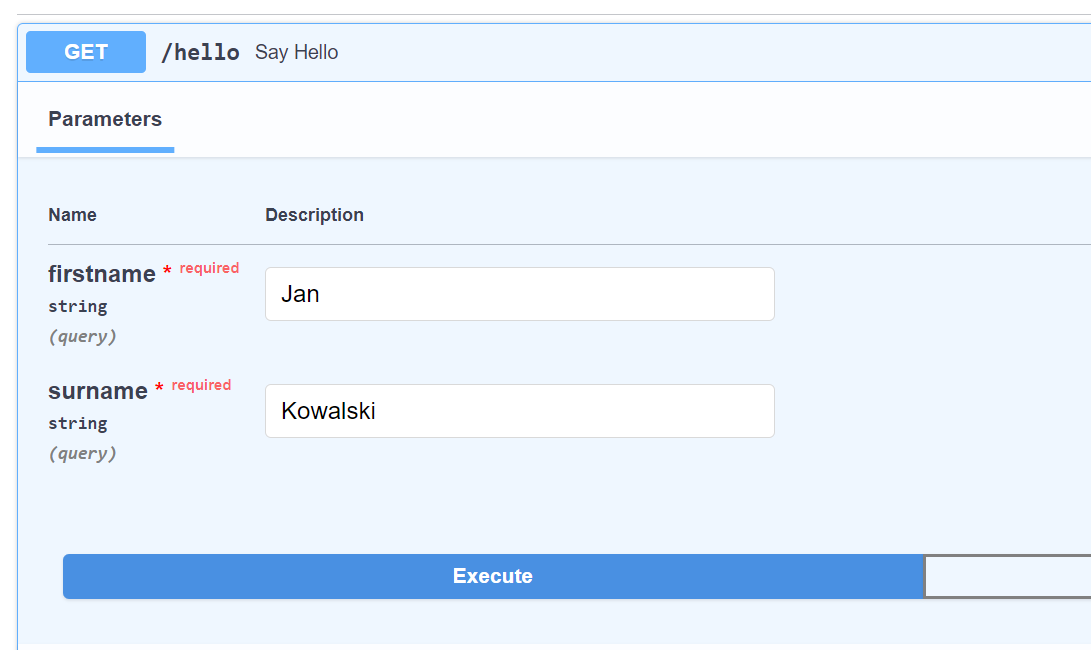

Otwórz stronę http://localhost:8000/docs#/default/say_hello_hello_get i wypróbuj serwis

### 8.2 Wdrożenie zbudowanego zbioru modeli jako mikroserwis

**TODO 8.2.1** zaimplementuj klasę ```ClassifierDeployment```
* W konstruktorze przekaż słowniki z modelami i etykietami
* Zaimplementuj metodę ```calssify`` zgodnie ze specyfikacją

In [103]:
import requests
from fastapi import FastAPI
from ray import serve
# import uvicorn

# 1: Define a FastAPI app and wrap it in a deployment with a route handler.
app = FastAPI()


@serve.deployment
@serve.ingress(app)
class ClassifierDeployment:
    
    def __init__(self,models,labels):
       self.models = models
       self.labels = labels
        
    # FastAPI will automatically parse the HTTP request for us.
    @app.get("/classify")
    def classify(self, entity: str, text: str) -> str:
        """
        Params: entity:str nazwa obiektu
                text: treść wypowiedzi do sklasyfikowania
        Returns: 
                tekstową etykietę (Irrevelant, Positive, Neutral, Negative)
        
        """
        k = entity.lower()
        if k not in self.models or self.models[k] is None:
            k = '*'
            if k not in self.models or self.models[k] is None:
                 return "Error: Generic model not available or failed to load."

        if k not in self.labels or not self.labels[k].size > 0:
            return f"Error: Labels for entity '{k}' not available or empty."

        model_to_use = self.models[k]
        labels_to_use = self.labels[k]
        
        y_pred_encoded = model_to_use.predict([text]) 
        predicted_label_index = y_pred_encoded[0]
        
        if predicted_label_index < len(labels_to_use):
            return labels_to_use[predicted_label_index]
        else:
            return "Error: Predicted label index out of bounds for available labels."

In [104]:
# 2: Deploy the deployment.
app = ClassifierDeployment.bind(models, labels)
serve.run(app, route_prefix="/")

INFO 2025-05-31 19:56:45,315 serve 14 -- Connecting to existing Serve app in namespace "serve". New http options will not be applied.
WARNING 2025-05-31 19:56:45,316 serve 14 -- The new client HTTP config differs from the existing one in the following fields: ['host', 'location']. The new HTTP config is ignored.
INFO 2025-05-31 19:56:46,467 serve 14 -- Application 'default' is ready at http://0.0.0.0:8000/.


DeploymentHandle(deployment='ClassifierDeployment')

Wyświetlimy przykładowe wypowiedzi

In [105]:
ds_train.filter(lambda row:row['Entity']=='Nvidia').random_shuffle(seed=1).to_pandas().head(20)

/usr/local/lib/python3.10/dist-packages/ray/data/dataset.py:1413: UserWarning: Use 'expr' instead of 'fn' when possible for performant filters.
  warnings.warn(
2025-05-31 19:56:51,295	INFO logging.py:290 -- Registered dataset logger for dataset dataset_21_0
2025-05-31 19:56:51,304	INFO streaming_executor.py:117 -- Starting execution of Dataset dataset_21_0. Full logs are in /tmp/ray/session_2025-05-31_19-34-49_939668_14/logs/ray-data
2025-05-31 19:56:51,306	INFO streaming_executor.py:118 -- Execution plan of Dataset dataset_21_0: InputDataBuffer[Input] -> TaskPoolMapOperator[ReadCSV] -> AllToAllOperator[Filter(<lambda>)->RandomShuffle]


Running 0: 0.00 row [00:00, ? row/s]

- ReadCSV->SplitBlocks(24) 1: 0.00 row [00:00, ? row/s]

- Filter(<lambda>)->RandomShuffle 2: 0.00 row [00:00, ? row/s]

Shuffle Map 3:   0%|                 | 0.00/1.00 [00:00<?, ? row/s]

Shuffle Reduce 4:   0%|              | 0.00/1.00 [00:00<?, ? row/s]

2025-05-31 19:56:51,908	INFO streaming_executor.py:220 -- ✔️  Dataset dataset_21_0 execution finished in 0.60 seconds


,TweetId,Entity,Sentiment,TweetContent
0,8887,Nvidia,Positive,@nvidia @NVIDIAGeForce but I can haz to 3080 m...
1,9036,Nvidia,Negative,
2,9067,Nvidia,Positive,"If @nvidia acquires ARM, what I want to see is..."
3,9082,Nvidia,Positive,This is totally insane! 14 Makes me want to up...
4,8934,Nvidia,Neutral,"Nvidia won't give up its ""crypto craziness"" in..."
5,8961,Nvidia,Positive,"Wow, few people would coming @Nvidia as such a..."
6,8806,Nvidia,Positive,Awesome - Nvidia RTX: Noise-destroying AI put ...
7,9076,Nvidia,Positive,these nvidia caucuses fuckin crazy
8,8898,Nvidia,Neutral,I Ubuntu freezes up after they resume from sus...
9,8903,Nvidia,Positive,Dell XPS 17 9700 Graphics Card Missing and Fli...


**TODO 8.2.2** Zamieśc kilka przykładowych wywołań mikroserwisu

In [107]:
print(requests.get("http://0.0.0.0:8000/classify", params={"entity": "nvidia",'text':'so like, is there even a single game where'}).json())

print(requests.get("http://0.0.0.0:8000/classify", params={"entity": "google", 'text': 'their new update is amazing'}).json())

print(requests.get("http://0.0.0.0:8000/classify", params={"entity": "microsoft", 'text': 'this product is quite bad'}).json())

Negative
Negative
Negative


**TODO 8.2.3** Powtórz wywołanie w intefejsie Swaggera. Możesz wkleić bezpośrednio zrzuty ekranu

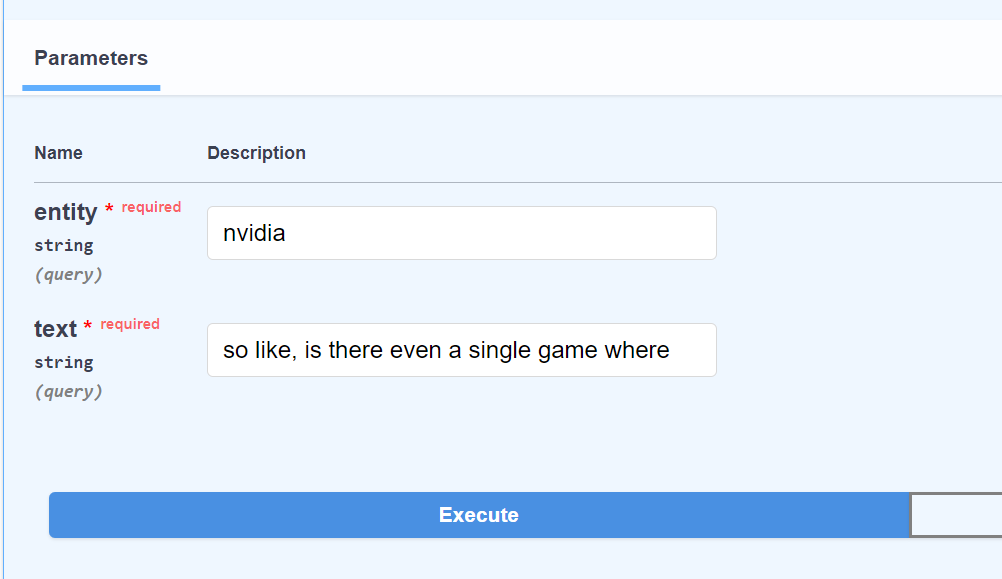

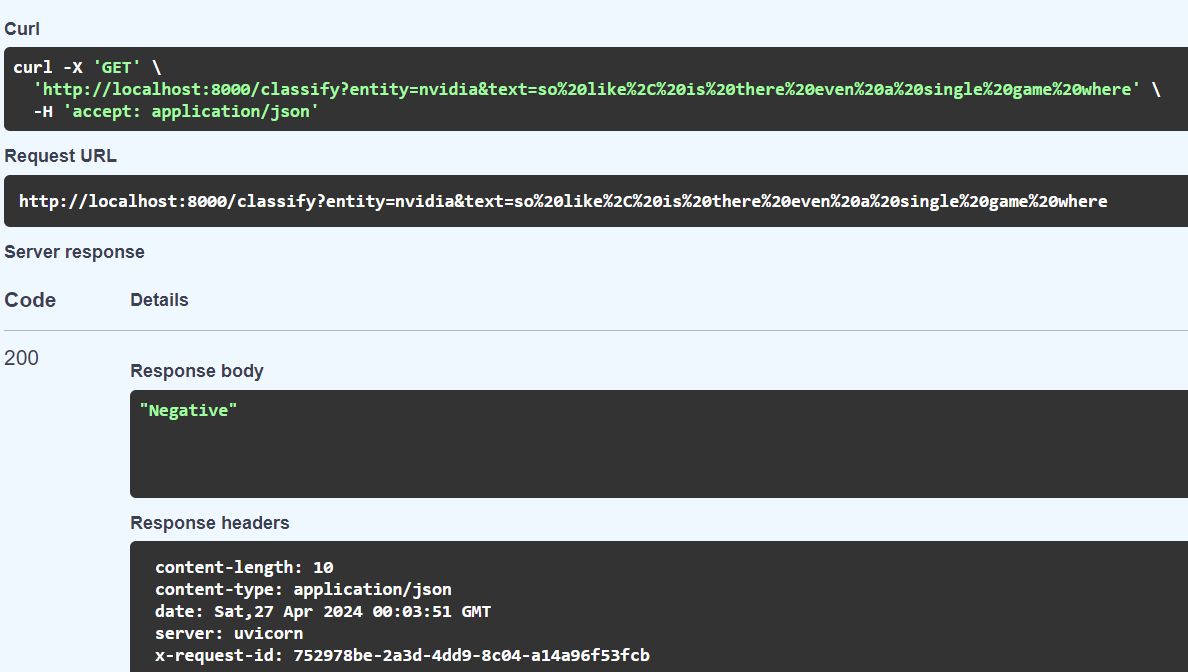


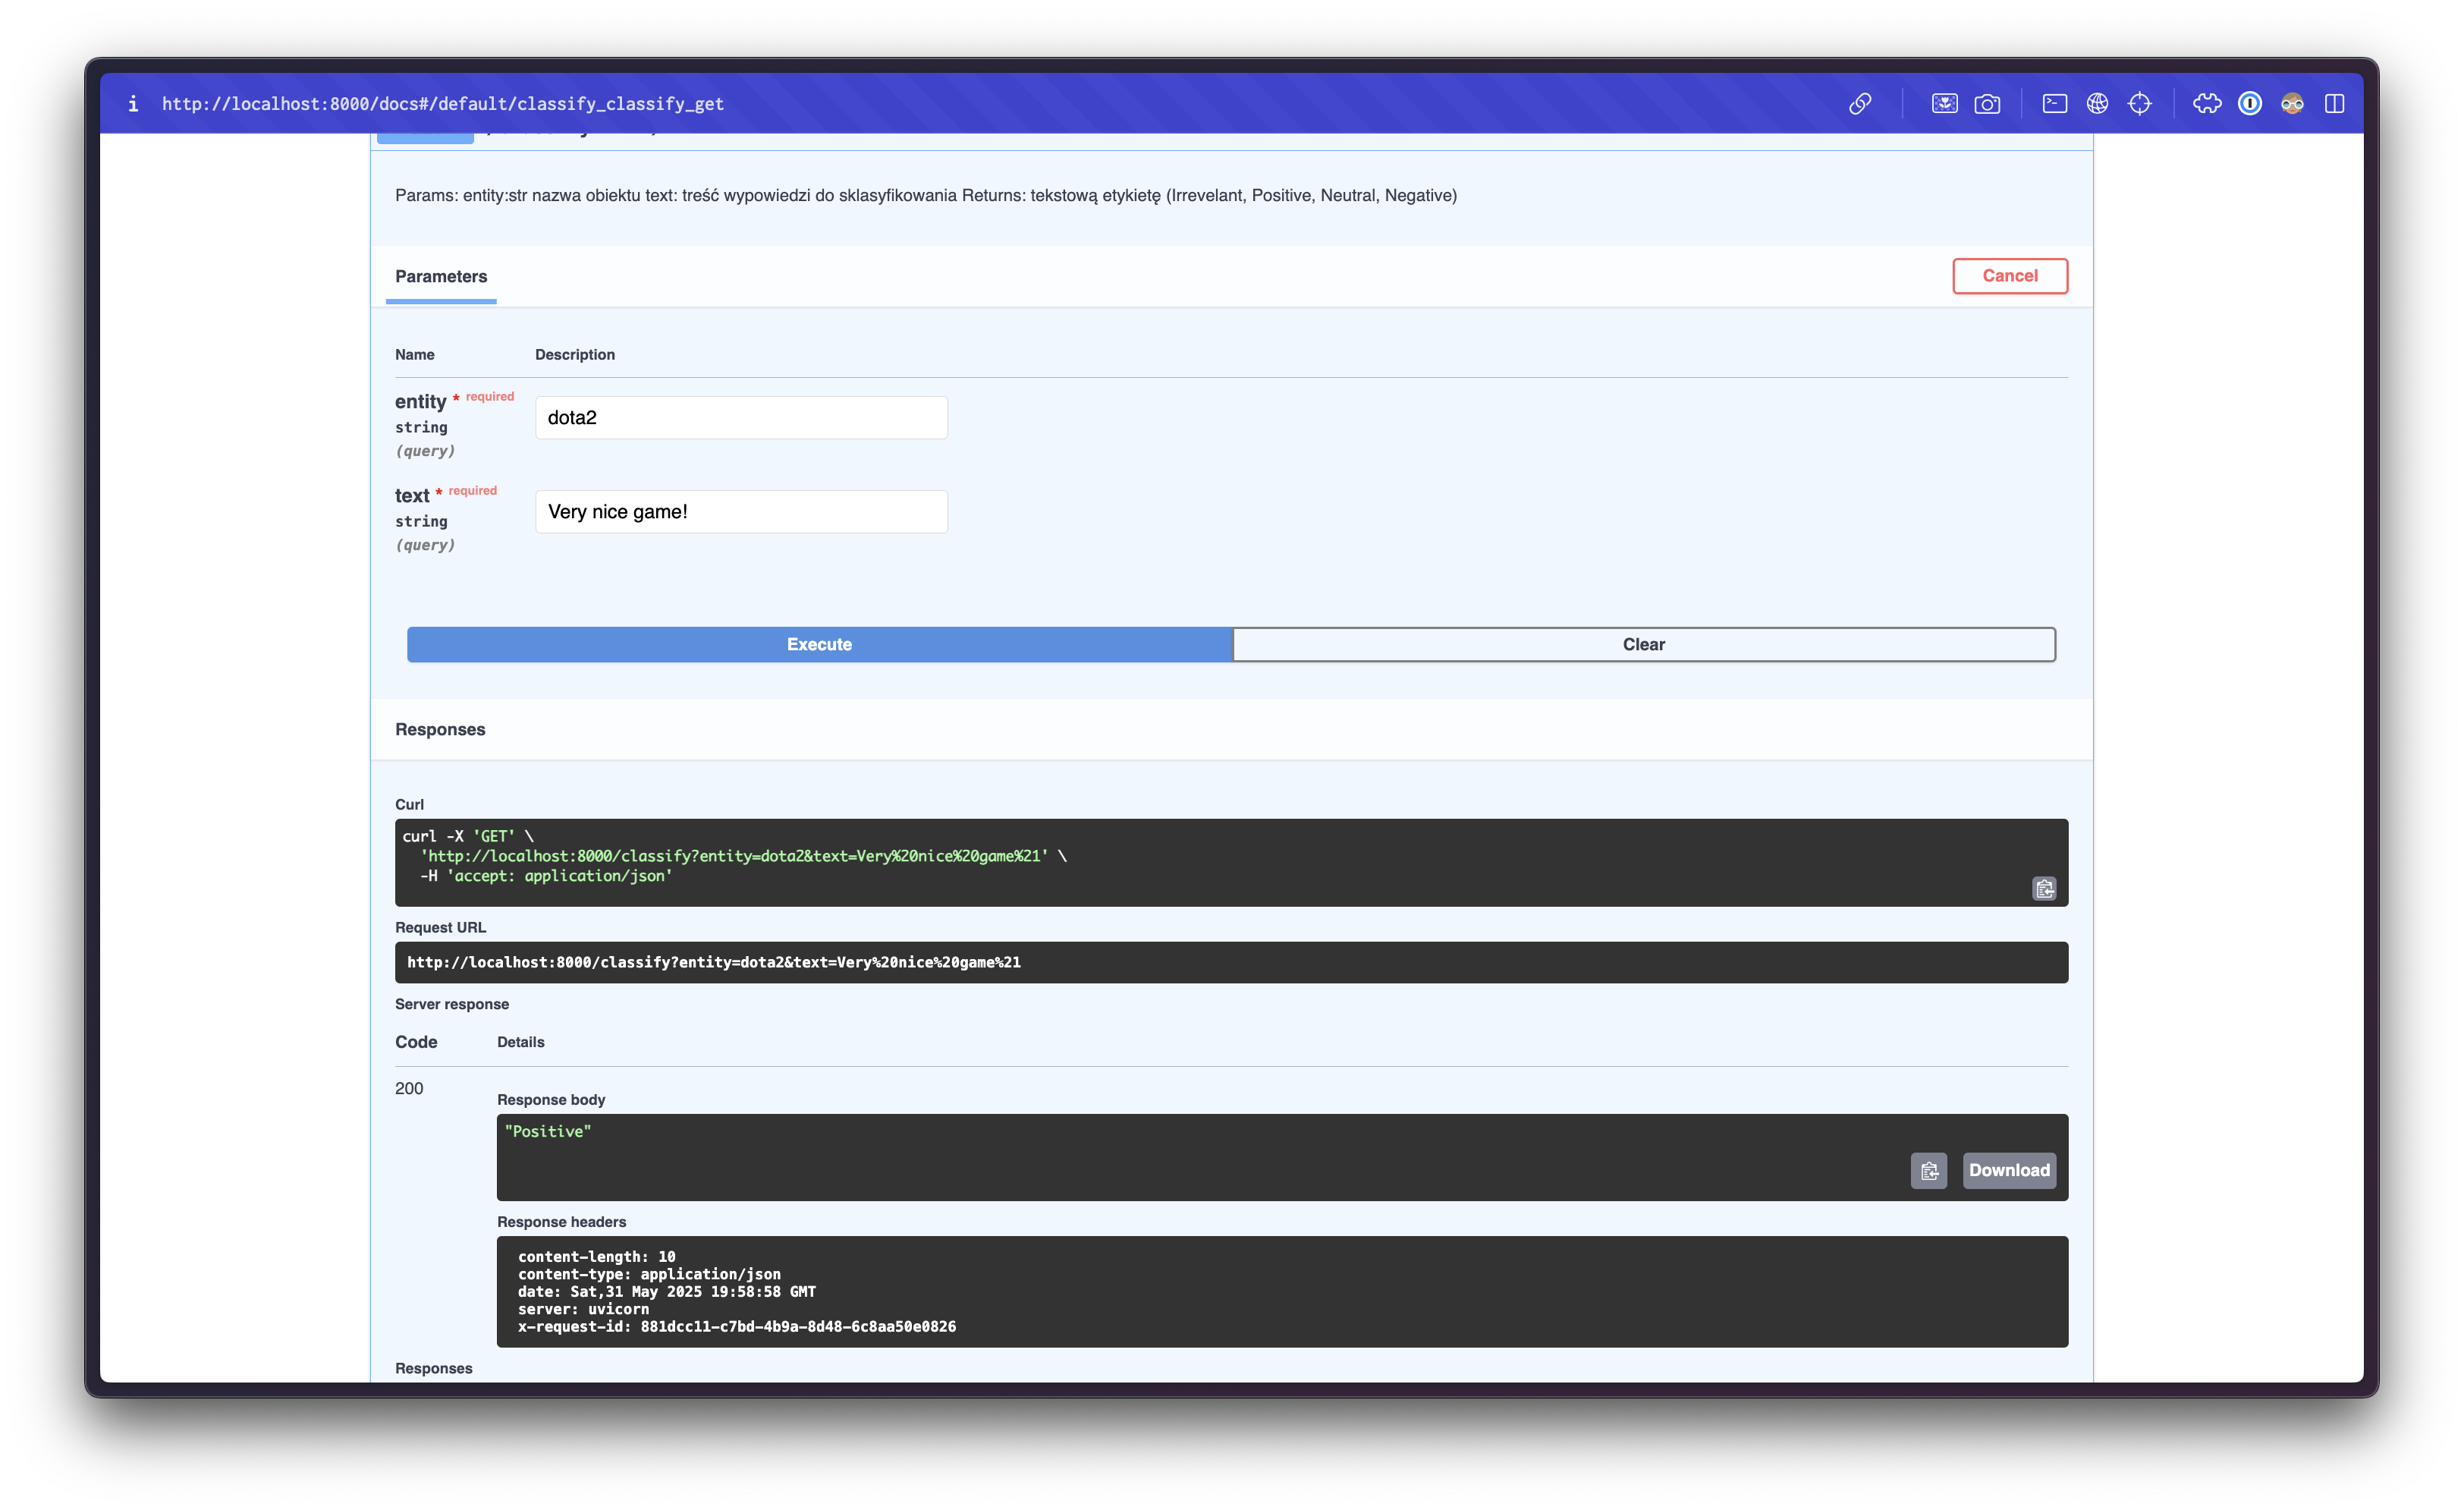